<a href="https://colab.research.google.com/github/Dimas0824/Machine_Learning/blob/main/Jobsheet_11/ML_WEEK11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📱 Praktikum 1
Klasifikasi SVM dengan Data Dummy Linier

In [1]:
!!pip install ipywidgets

['Requirement already satisfied: ipywidgets in /usr/local/lib/python3.12/dist-packages (7.7.1)',
 'Requirement already satisfied: ipykernel>=4.5.1 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (6.17.1)',
 'Requirement already satisfied: ipython-genutils~=0.2.0 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (0.2.0)',
 'Requirement already satisfied: traitlets>=4.3.1 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (5.7.1)',
 'Requirement already satisfied: widgetsnbextension~=3.6.0 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (3.6.10)',
 'Requirement already satisfied: ipython>=4.0.0 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (7.34.0)',
 'Requirement already satisfied: jupyterlab-widgets>=1.0.0 in /usr/local/lib/python3.12/dist-packages (from ipywidgets) (3.0.15)',
 'Requirement already satisfied: debugpy>=1.0 in /usr/local/lib/python3.12/dist-packages (from ipykernel>=4.5.1->ipywidgets) (1.8.15)',
 'Requirement 

## Langkah 1 - Import Library

In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Langkah 2 - Membuat Data Dummy
Pada praktikum ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

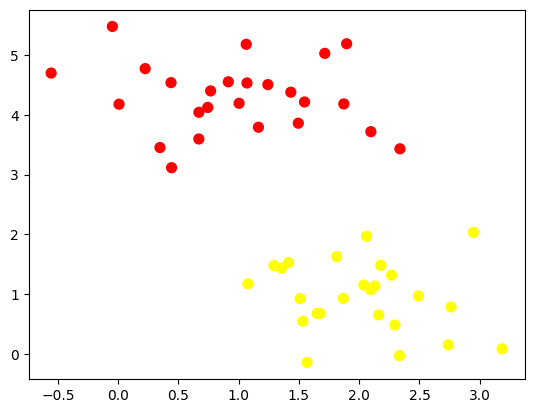

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Buat Ilustrasi Garis Pemisah
Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

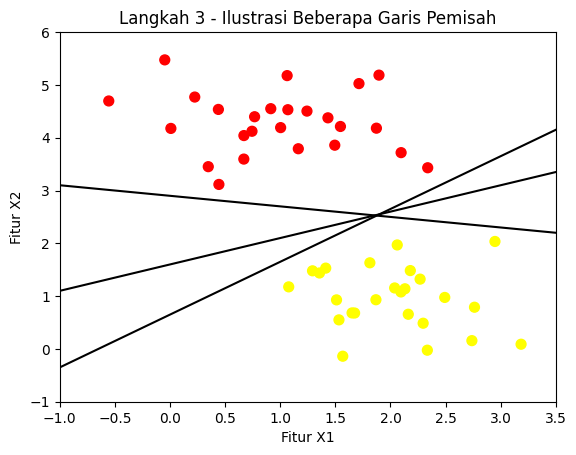

In [4]:
# Asumsikan X dan y sudah ada dari langkah sebelumnya (Langkah 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Buat beberapa garis pemisah (m = slope, b = intercept)
xfit = np.linspace(-1, 3.5)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')  # warna hitam

plt.xlim(-1, 3.5)
plt.ylim(-1, 6)
plt.title("Langkah 3 - Ilustrasi Beberapa Garis Pemisah")
plt.xlabel("Fitur X1")
plt.ylabel("Fitur X2")
plt.show()

## Langkah 4 - Ilustrasi Margin
Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

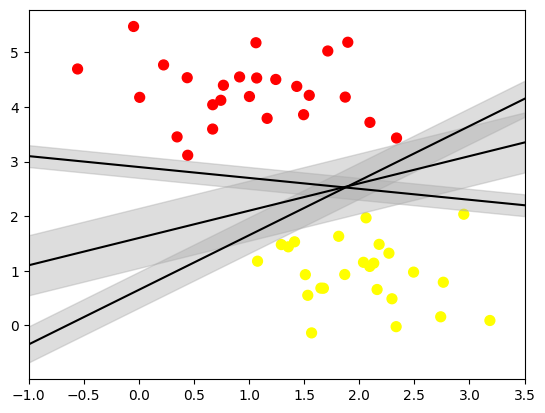

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model
Selanjutnya, kita akan melakukan pelatihan terhadap model SVM. Model kali ini akan menggunakan fungsi (kernel) dengan jenis linier.

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Lakukan plotting dengan fungsi yang telah dibuat.

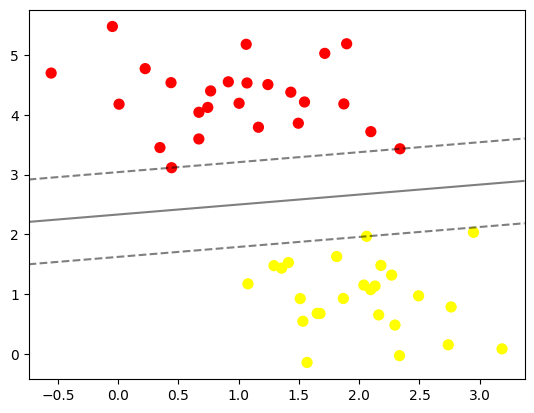

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_



In [9]:
# Tampilkan titik data support vector
print("Support vectors:")
print(model.support_vectors_)

Support vectors:
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

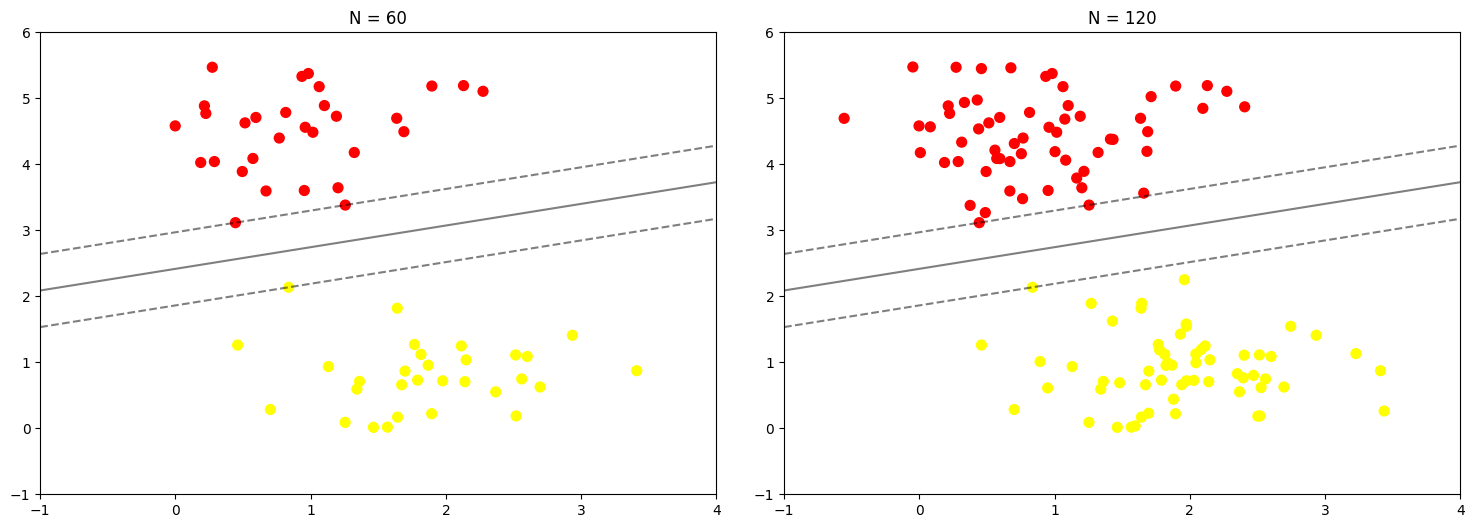

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini

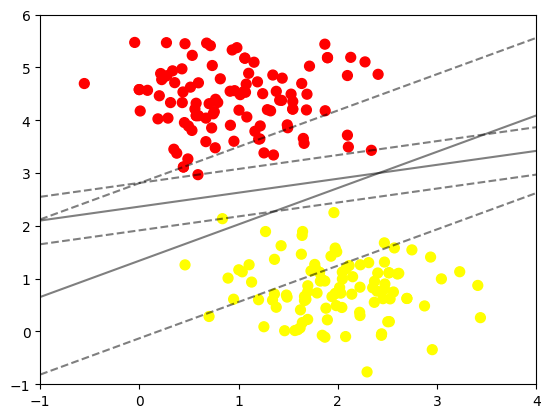

In [11]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
# interact(plot_svm, N=[10, 200], ax=fixed(None))

# Karena widget membuat save notebook error di github maka diberikan interactive alternatif dari widgets ini
print(plot_svm(N=10, ax=None))

print(plot_svm(N=200, ax=None))
